# Heart Disease Prediction ML Model (project 1)

In [229]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##Data set import and preprocessing


In [230]:
heart_data = pd.read_csv('/content/heart.csv')

In [231]:
heart_data = heart_data.drop_duplicates()

In [232]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [233]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [234]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [235]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [236]:
#statistical data measure
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [237]:
#count target values
heart_data['target'].value_counts()

,count
target,
1,164
0,138


In [238]:
#split data into features and target
x=heart_data.drop(columns='target',axis=1)
y=heart_data['target']

In [239]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


##Splitting into train and test data

In [240]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [241]:
y_train.value_counts()

,count
target,
1,131
0,110


##Model Trainning

In [242]:
model = LogisticRegression()

In [243]:
model = LogisticRegression()
model.fit(x_train,y_train)
def model_predict_with_threshold(x,model = model , threshold = 0.0878 ) :
  y_proba = model.predict_proba(x)[:,1]
  return (y_proba>=threshold).astype(int)

# Model Evaluation

In [244]:
x_train_prediction=model_predict_with_threshold(x_train)
train_accuracy=accuracy_score(x_train_prediction,y_train)
x_test_prediction=model_predict_with_threshold(x_test)
test_accuracy=accuracy_score(x_test_prediction,y_test)
print(f"train accuracy = {train_accuracy} \ntest accuracy = {test_accuracy}")

train accuracy = 0.7510373443983402 
test accuracy = 0.7049180327868853


##Prediction time

In [245]:
print(model.predict([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]))

[1]


In [246]:
from sklearn.metrics import confusion_matrix, recall_score

# Calculate the confusion matrix
cm = confusion_matrix(y_train, x_train_prediction)
print("Confusion Matrix:")
print(cm)

# Calculate the recall score for the positive class (target=1)
# Recall = TP / (TP + FN)
# The target value 1 corresponds to the second row/column in the confusion matrix
recall = recall_score(y_test, x_test_prediction, pos_label=1)
print(f"\nRecall for positive class (target=1): {recall}")

Confusion Matrix:
[[ 52  58]
 [  2 129]]

Recall for positive class (target=1): 1.0


In [247]:
y_proba = model.predict_proba(x_test)[:, 1]
print(y_proba)

[0.03817918 0.74472622 0.94631996 0.01193783 0.90856736 0.81012257
 0.75379539 0.01336956 0.50110054 0.68961765 0.8712027  0.55109593
 0.08852227 0.41373461 0.58451522 0.84764171 0.7596853  0.33133621
 0.59768477 0.65206849 0.44164547 0.95524788 0.56481668 0.05975828
 0.24310213 0.00686759 0.01230918 0.2940516  0.90208992 0.93244004
 0.08781212 0.98193461 0.93025092 0.04643255 0.11562866 0.14817888
 0.95392908 0.06582012 0.83637319 0.73891932 0.03539779 0.16933925
 0.9656406  0.66715284 0.4241747  0.80692003 0.58099195 0.33831747
 0.65915763 0.33949852 0.00792183 0.62777198 0.10934284 0.9125012
 0.70716732 0.67234416 0.98832994 0.49861086 0.98227939 0.36202986
 0.7862908 ]


In [248]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
print(recall)
print(thresholds)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.96969697
 0.96969697 0.96969697 0.96969697 0.96969697 0.96969697 0.96969697
 0.96969697 0.96969697 0.96969697 0.96969697 0.93939394 0.93939394
 0.93939394 0.93939394 0.93939394 0.90909091 0.90909091 0.87878788
 0.84848485 0.81818182 0.81818182 0.78787879 0.75757576 0.72727273
 0.6969697  0.6969697  0.66666667 0.63636364 0.60606061 0.57575758
 0.57575758 0.54545455 0.51515152 0.48484848 0.45454545 0.42424242
 0.39393939 0.36363636 0.33333333 0.3030303  0.27272727 0.24242424
 0.21212121 0.18181818 0.15151515 0.12121212 0.09090909 0.06060606
 0.03030303 0.        ]
[0.00686759 0.00792183 0.01193783 0.01230918 0.01336956 0.03539779
 0.03817918 0.04643255 0.05975828 0.06582012 0.08781212 0.08852227
 0.10934284 0.11562866 0.14817888 0.16933925 0.24310213 0.2940516
 0.33133621 0.33831747 0.33949852 0.36202986 0.41373461 0.4241747
 0.44164547 0.49861086 0.50110054 0.55109593 0.5

In [249]:
best_threshold = None
best_precision = 0

for p, r, t in zip(precision, recall, thresholds):
    if r >= .97 and p > best_precision:
        best_precision = p
        best_threshold = t

print(f"Best threshold with recall=1.0: {best_threshold:.4f}, precision: {best_precision:.4f}")


Best threshold with recall=1.0: 0.0878, precision: 0.6471


In [250]:
from sklearn.metrics import precision_score

# Calculate the precision score for the positive class (target=1)
# Precision = TP / (TP + FP)
precisiona = precision_score(y_test, x_test_prediction, pos_label=1)
print(f"\nPrecision for positive class (target=1): {precisiona}")


Precision for positive class (target=1): 0.6470588235294118


#**Output Visuals**

##Confusion Matrix HeatMap

Text(0.5, 1.0, 'Confusion Matrix')

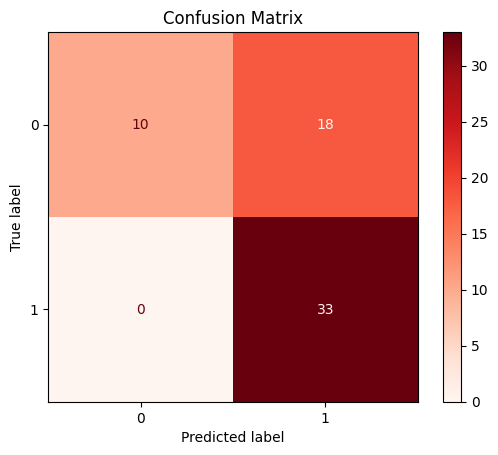

In [251]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model_predict_with_threshold(x_test)  # custom threshold
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')


##Precison Recall vs Thersholds Curve





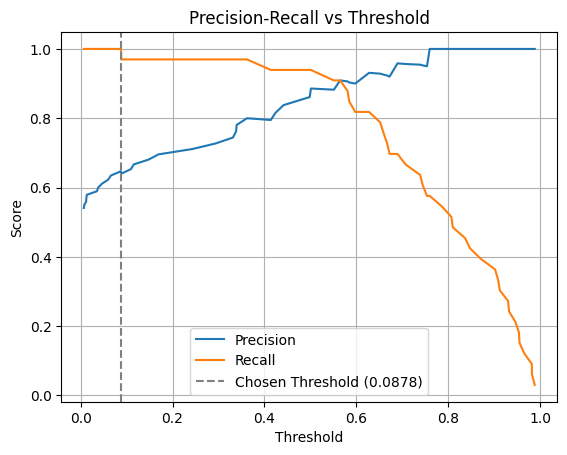

In [252]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.axvline(0.0878, color='grey', linestyle='--', label='Chosen Threshold (0.0878)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()
